## Linear SVM For Binary Classification

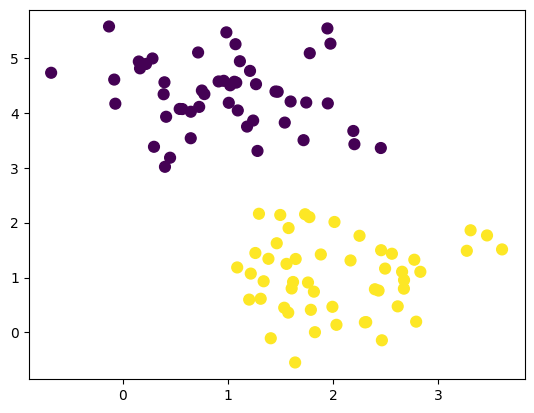

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# create data for our classification purpose
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.65)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60);

In [13]:
X[:5], y[:5]

(array([[3.46137089, 1.76640683],
        [1.3094129 , 0.61308063],
        [0.16195309, 4.80915606],
        [0.39920934, 3.01626962],
        [2.82748689, 1.10367636]]),
 array([1, 1, 0, 0, 1]))

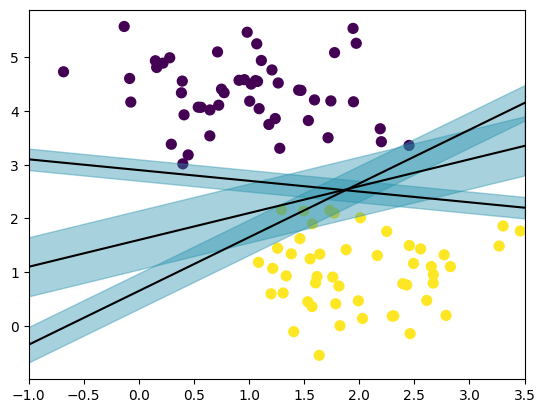

In [16]:
# visualize the margin of the data
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = "#2490ab", alpha = 0.4)
    
plt.xlim(-1, 3.5);

Our goal is to find the line that maximizes the margin which we can see is done by middle line.

In [41]:
# Performing SVM classification on data
from sklearn import svm
# SVC means support vector classifier
model = svm.SVC(kernel = "linear", C = 100)  
# kernel param to define the choice of your kernel and C to adjust the strength of the regularization (inversly proportional)
model.fit(X, y)

SVC(C=100, kernel='linear')

The choice of c determines the margin. Choose small C if you want a larger margin but this will make some training points to be misclassified and result in simpler model with strong regularization (first term in the equation) and larger C will result in complex model and weaker regularization but it may lead to overfitting. 

Here is the summary:

large C:
* A large C corresponds to a lower regularization strength.
* The optimization will be more focused on correctly classifying each training point, potentially leading to a smaller-margin hyperplane.
* The model will be less tolerant of misclassifications and may try to fit the training data more closely.

Small C: 
* A small C corresponds to a higher regularization strength.
* The optimization will put more emphasis on achieving a larger-margin hyperplane and being tolerant to potential misclassifications.
* The model will be more robust to outliers and noise in the data.

The best thing to do is use cross-validation to find the best value of C according to our problem.

In [42]:
model.decision_function(X)

array([ 2.50551148,  4.08808326, -4.64901013, -0.99982868,  3.61492345,
       -1.28329732, -3.1201606 ,  2.26729063, -3.06457525,  4.48815604,
       -3.64976971,  3.99911267, -4.59160051, -3.63530151,  2.67234568,
        3.06043567,  5.40984942, -3.05197969,  4.08250789,  2.90477444,
       -3.82841259, -3.51224413,  1.6120079 , -4.7897537 ,  4.10383657,
       -3.92609308,  4.67800397, -5.68176834, -3.70849765,  2.11630503,
        5.27320886, -3.74951257,  3.46312144,  5.26922727,  1.28125667,
       -2.88513108,  3.58221782,  1.536352  , -1.52811971,  2.87841949,
       -1.76040533, -4.94366246, -6.26558562, -2.3990876 ,  0.99991481,
        2.98283988,  5.27244699,  5.47231968, -4.32305612, -5.04168991,
        4.60648798,  3.14430529, -5.50538648, -4.21006865, -1.00008792,
       -3.86530306, -1.22148565,  3.64799646,  3.55497621,  5.977543  ,
        2.75612062, -2.97144557, -4.96824819,  3.38649252, -5.22372651,
        1.16378928, -2.81090046, -1.7044153 ,  3.15792285, -2.22

Here for each sample in the input matrix X, decision_function(X) calculates the signed distance of that sample to the decision hyperplane. The sign of this distance indicates on which side of the hyperplane the sample lies, and the magnitude of the distance represents the confidence of the classification.
* A positive distance indicates that the sample is on the side of the hyperplane corresponding to the positive class, while a negative distance indicates the opposite. The larger the magnitude of the distance, the more confidently the SVM classifies the sample.
* The decision function is useful for understanding not only the predicted class labels but also the degree of certainty or confidence associated with those predictions.

In [43]:
# check the parameters both defined and default
model.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

You will also see a probability parameter which is default to `False`. SVM is not a probabilistic model but uses a technique called Platt scaling to achieve probabilties in prediction classes like logistic regression. If you set this param to `True` you will be able to use `predict()`, `predict_proba()`, etc. methods on SVM too in sklearn. Probability estimates provided by Platt scaling should be interpreted with caution, especially if your specific application requires well-calibrated probabilities. For strict probability estimation tasks, other models like logistic regression might be more appropriate.To learn more about other parameters implemented in sklearn,read their documentation. 

There are also some attributes that you can check: 

In [44]:
model.classes_

array([0, 1])

In [45]:
# support vectors
model.support_vectors_

array([[0.39920934, 3.01626962],
       [2.45161058, 3.35844964],
       [1.29273731, 2.16101743]])

In [46]:
# number of support vectors for each class
model.n_support_

array([2, 1], dtype=int32)

In [47]:
# plot the decision function
def plot_decision_function(model, ax=None, plot_support=True):
    """Plots the decision function"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    # creates a 2D grid of coordinates (X and Y) based on the x and y values.
    Y, X = np.meshgrid(y, x)
    
    # reshapes the grid into a 2D array of (x, y) coordinates.
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

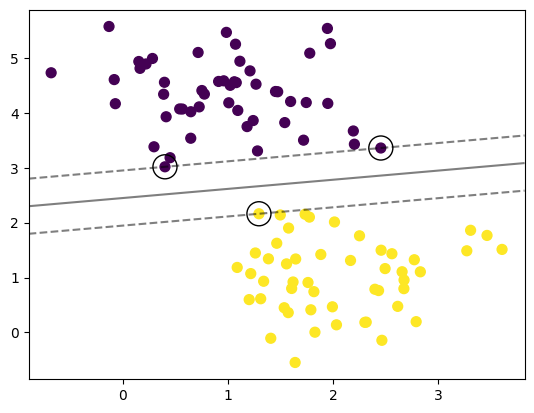

In [48]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50)
plot_decision_function(model);     # circuled points are our support vectors

One thing you should note here, Only support vectors determine the fit not the other points far from the line because only support vectors are part of the loss function.

Choosing a small value of C

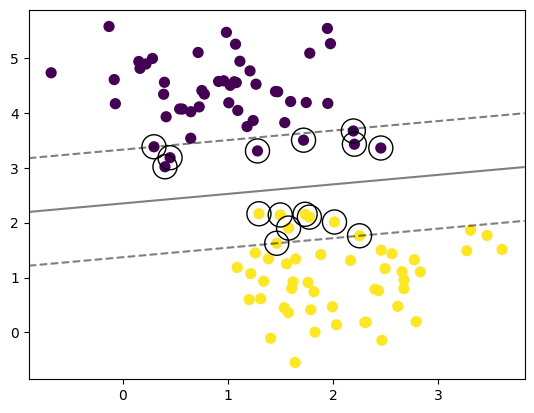

In [49]:
model2 = svm.SVC(kernel = "linear", C = 0.1)  
model2.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50)
plot_decision_function(model2);

As you can see that choosing a small value of C allows some misclassification. Let's use cross validation to find the best value of C

In [57]:
from sklearn.model_selection import GridSearchCV

# value of C grid search will look for: 
param_grid = {'C': [0.1, 0.5, 1, 10, 100]}

# performs linear svm for each value
grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(X, y)

# gives the best value of C
best_C = grid_search.best_params_['C']
print(best_C)

0.1


There are two other classes in sklearn that does the same. One is LinearSVC and another is SGDClassifier. 

LinearSVC:
* Best for linear case only.
* If you have large samples use LinearSVC.
* Offers more flexibility in the choice of penalties and loss functions. 
* Default loss hyperparameter is "squared hinge" so make it "hinge" while using unless required.
* Set dual hyperparamter to false unless there are more features than training instances for better performance. 

SGDClassifier: 
- Useful for online learning.
- Use `hinge` loss for SVM
- It does not converge as fast as the LinearSVC class. 
- Uses stochastic gradient descent (SGD)
- Allows minibatch (online/out-of-core) learning via the `partial_fit` method

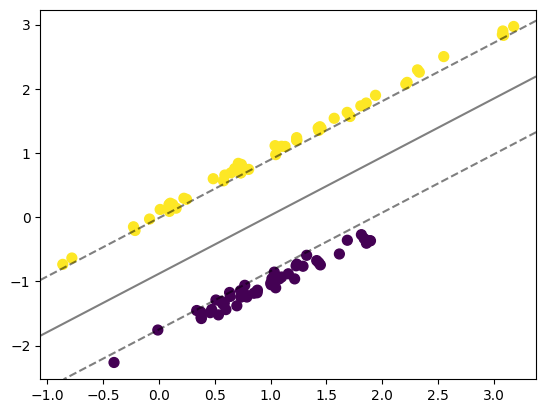

In [79]:
# Linear SVC using C = 1000
model3 = svm.LinearSVC(loss = "hinge", C = 1000,  max_iter=20000)  
model3.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50)

plot_decision_function(model3, plot_support = False);  # keep plot_support to False as it does not have that attribute

max_iter is iterations for converging. You don't need to specify that unless you get the error "ConvergenceWarning: Liblinear failed to converge, increase the number of iterations".If you find that the warning persists even with a higher max_iter, it might be worth exploring other options or checking the data for potential issues such as scaling or collinearity.

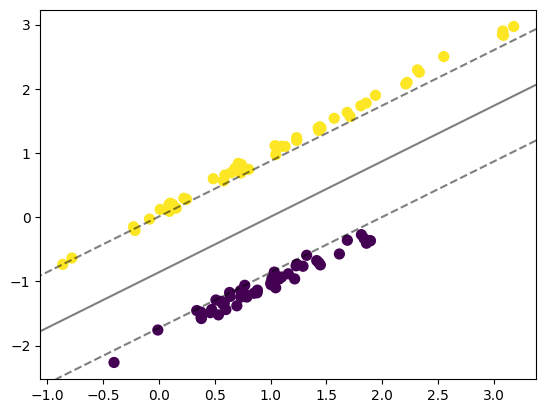

In [80]:
# Linear SVC using C = 0.9
model4 = svm.LinearSVC(loss = "hinge", C = 0.9,  max_iter=20000)  
model4.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50)
plot_decision_function(model4, plot_support = False);

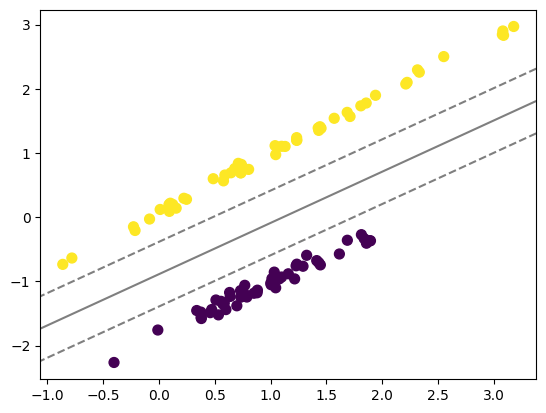

In [94]:
# SGDClassifier for SVM
from sklearn.linear_model import SGDClassifier
model5 = SGDClassifier(loss='hinge',penalty='l2', alpha=0.004, max_iter=1000, random_state=42)
model5.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50)
plot_decision_function(model5, plot_support = False);

Text(0, 0.5, 'Feature 2')

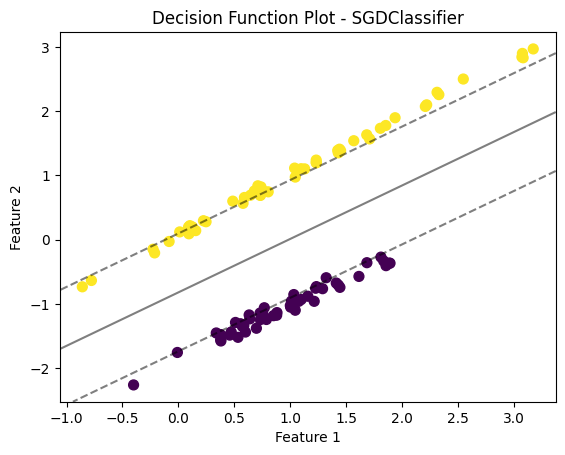

In [110]:
model6 = SGDClassifier(loss='hinge',penalty='l2', alpha = 0.1, max_iter=1000, random_state=42)
model6.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50)
plot_decision_function(model6, plot_support = False)
plt.title('Decision Function Plot - SGDClassifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Notice what's happening here with the values of alpha. Seems like the effects are inverse of C.

#### Note On Multiple Classes
If you have multiple classes then these implementation will automatically adjust for them. 

## Non-Linear SVM

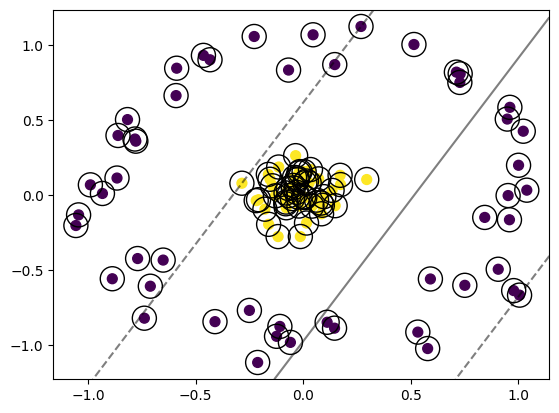

In [112]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

model7 = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_decision_function(model7, plot_support= True);

Since the data is non-linear and we are using linear kernal are model failed to classify. So, we are going to use some kernel that will project our data to higher dimensional space where it is linearly separable.

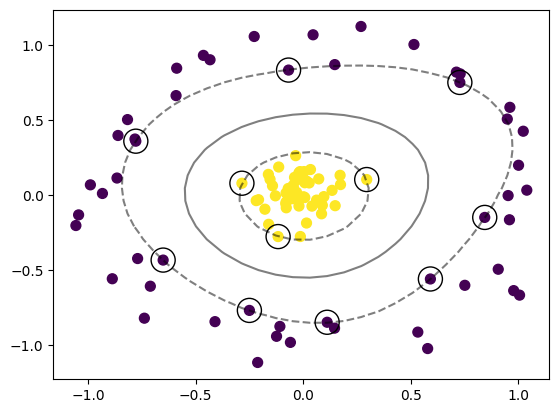

In [118]:
# Using rbf kernel
model7 = svm.SVC(kernel='rbf', C = 10).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_decision_function(model7, plot_support= True);

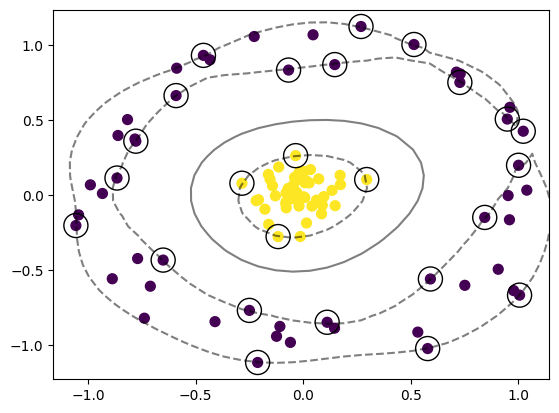

In [122]:
model8 = svm.SVC(kernel='rbf', gamma=5, C = 10).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_decision_function(model8, plot_support= True);

If your model is overfitting, you should reduce the value of gamma; if it is underfitting,
you should increase it. It works like regularization hyperparameter. 

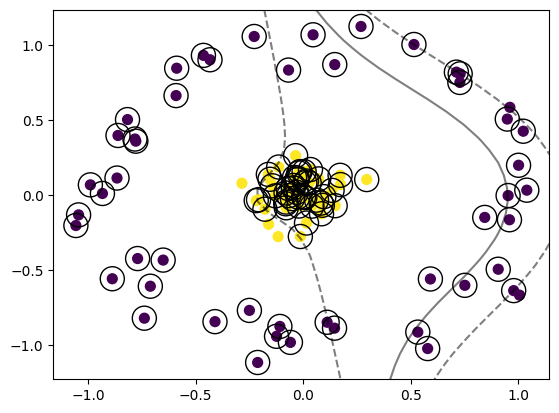

In [126]:
# using polynomial kernel
model9 = svm.SVC(kernel='poly', coef0 = 0, gamma=5, C = 10).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_decision_function(model9, plot_support= True);

So, bad! We can adjust coef0 for polynomial and sigmoid kernel in sklearn and gamma for all. 

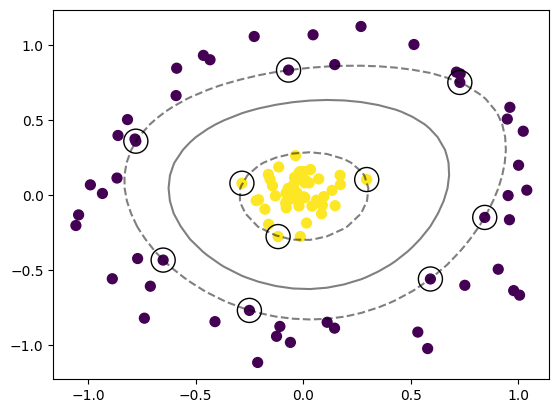

In [127]:
model9 = svm.SVC(kernel='poly', coef0 = 0.5, gamma=5, C = 10).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_decision_function(model9, plot_support= True);

Only SVC has kernel option but it has higher time complexity as compared to others I talked about. Additionally, you can also define your own kernel function and implement it. Kernel implementation may require domain knowledge. 

## Face Recognition (Multiclass Classification) Example - SVM
Before you proceed ahead, make sure you have read my tutorial on PCA. 

In [128]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


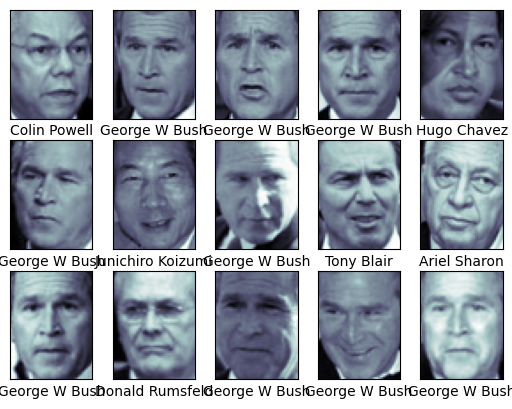

In [132]:
ig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = "bone")
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [135]:
# create a train and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [136]:
X_train, y_train

(array([[0.41960785, 0.41830066, 0.42352942, ..., 0.41960788, 0.37124184,
         0.3895425 ],
        [0.34640524, 0.22091503, 0.21045752, ..., 0.82091504, 0.8248367 ,
         0.8300654 ],
        [0.53333336, 0.4797386 , 0.49542487, ..., 0.627451  , 0.654902  ,
         0.67843133],
        ...,
        [0.29673204, 0.20784314, 0.17124183, ..., 0.13725491, 0.2901961 ,
         0.32418302],
        [0.18039216, 0.3633987 , 0.4745098 , ..., 0.9895425 , 0.98692805,
         0.9777778 ],
        [0.62614375, 0.54771245, 0.5124183 , ..., 0.03398693, 0.04183007,
         0.03267974]], dtype=float32),
 array([3, 6, 3, ..., 3, 7, 1]))

We will use PCA for dimensionality reduction because: 
1. SVMs may suffer from the "curse of dimensionality," where the number of training samples required to achieve good generalization increases exponentially with the number of features.
2. If the original features are highly correlated (multicollinearity), PCA can decorrelate the features by transforming them into a set of linearly uncorrelated variables (principal components). This can help SVMs better capture the underlying patterns in the data.
3. Noise reduction. 
4. Computational Efficiency.

In [139]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# pcs with unit varince it ensures that each feature contributes equally to the learning process
# and it mitigates scaling issues if any
pca = PCA(n_components=150, svd_solver="randomized", whiten=True, random_state=42)

# use class_weight hp in case of unbalanced classes
svc = svm.SVC(kernel='rbf', class_weight='balanced')

model = make_pipeline(pca, svc)

In [144]:
# perform cross-validation for finding best hyperparameters
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv = 5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


In [146]:
# select the model with best paramas
model = grid.best_estimator_

# make prediction
yfit = model.predict(X_test)

In [148]:
print(yfit)

[3 4 3 6 6 1 3 3 3 1 3 3 0 3 2 1 7 2 3 2 7 7 5 5 0 3 6 7 3 3 0 6 3 2 2 3 2
 7 3 2 3 3 7 1 3 3 0 2 1 2 7 3 7 6 7 3 7 1 7 0 4 2 7 2 5 4 7 3 4 1 1 5 4 1
 3 4 0 4 3 3 1 3 1 0 3 2 3 2 7 1 1 1 2 7 3 7 7 3 3 1 3 7 1 4 3 3 0 3 7 0 3
 1 0 7 7 1 3 2 7 4 7 7 5 2 3 3 3 3 2 2 3 7 0 3 4 3 4 1 2 1 7 6 5 3 3 1 1 3
 5 4 3 2 7 1 7 1 3 0 1 4 6 1 2 3 2 3 1 7 2 2 1 7 2 3 1 1 1 3 3 1 0 4 1 1 7
 1 1 5 3 4 3 3 7 5 6 3 7 4 3 2 0 3 2 3 3 6 3 3 1 7 3 6 1 2 3 1 1 7 6 3 1 3
 4 7 7 2 7 7 5 7 1 3 3 7 4 4 7 2 3 1 3 4 3 1 4 3 1 1 5 1 2 3 4 1 1 1 2 2 3
 7 3 7 3 7 3 1 3 1 3 1 1 1 3 3 1 4 4 3 1 4 1 0 0 3 2 0 2 5 1 3 3 6 7 2 3 6
 3 1 1 5 1 1 7 0 3 3 3 3 3 5 0 1 1 3 3 1 1 7 1 1 6 3 3 1 5 7 3 2 1 3 3 3 3
 7 3 1 0]


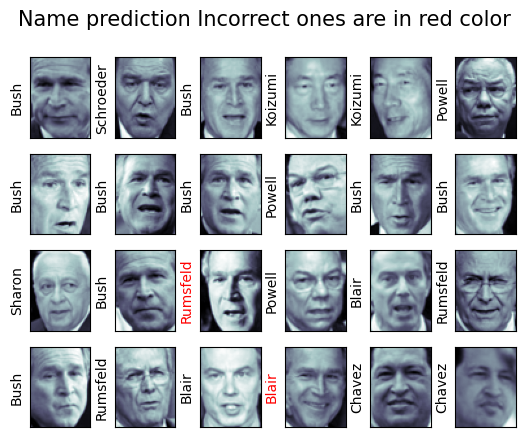

In [152]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Name prediction Incorrect ones are in red color', size=15);

In [154]:
# classification report of our model
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



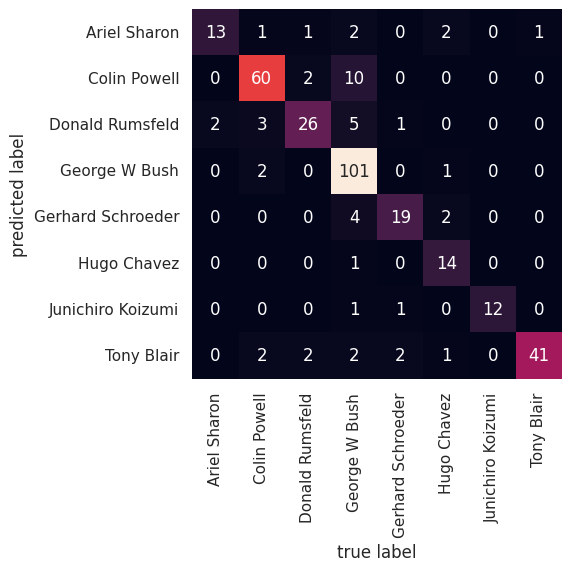

In [157]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Diagonal elements (top-left to bottom-right): Correctly classified instances and Off-diagonal elements: Misclassified instances.

## IRIS Datasets SVM Classification End-to-end Example

Accuracy: 1.00


Classification Report:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30





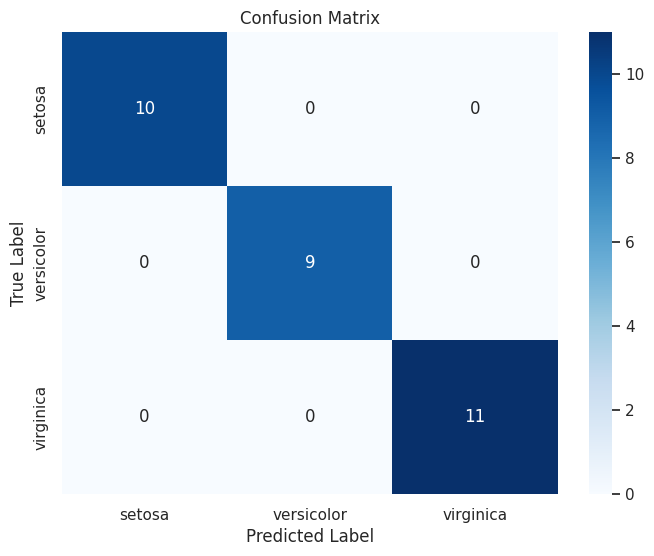

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (Standardization) - Scaling is important as explained earlier in concept
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model with RBF kernel
svm_model = svm.SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\n")
print("Classification Report:")
print("\n")
print(classification_rep)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
print("\n")
plt.title('Confusion Matrix')
plt.show()

## Support Vector Regression 
We have already talked about the mathematical concepts and theory in the post. Let see some examples. 

> The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

1. Important parameter is epsilon in addition to what we talked about. It controls the width. 
2. Adding more training instances within the margin (epsilon-tube) does not affect the model’s predictions; thus, the model is said to be ϵ-insensitive.
3. LinearSVR class provides a faster implementation than SVR class in sklearn but only considers the linear kernel.


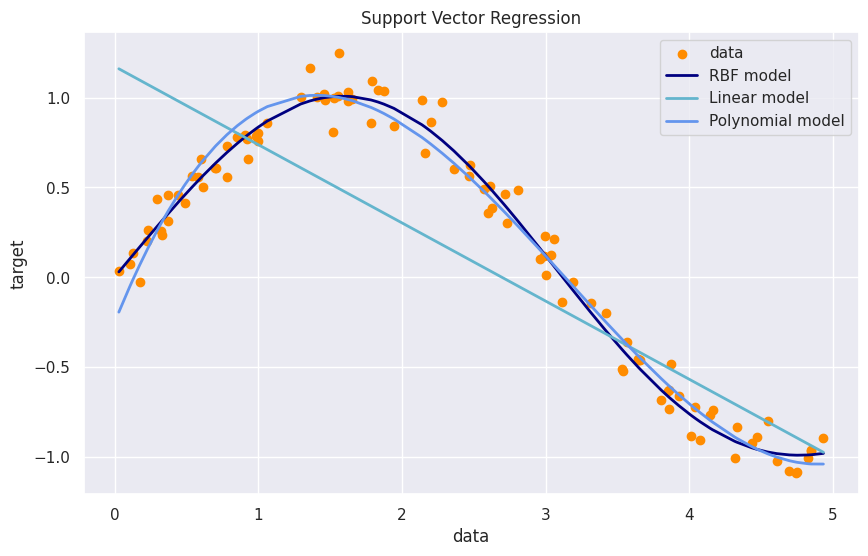

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Fit SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=0.1)
svr_poly = SVR(kernel='poly', C=100, degree=3, epsilon=0.1, coef0=1)

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


This is how the selection of epsilon value affects the regression output.

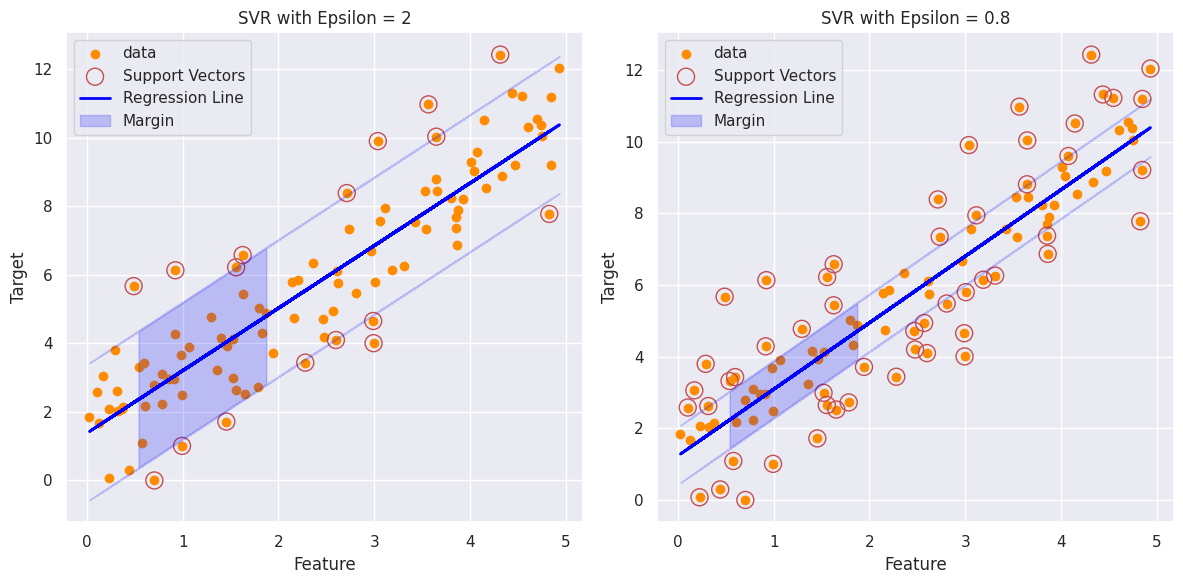

In [184]:
# Generate a linear dataset
np.random.seed(42)
X = 5 * np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + 1.5 * np.random.randn(100)

# Fit SVR models with different epsilon values
epsilon_values = [2, 0.8]

plt.figure(figsize=(12, 6))

for i, epsilon in enumerate(epsilon_values, 1):
    plt.subplot(1, 2, i)

    # Fit SVR model
    svr = SVR(kernel='linear', C=100, epsilon=epsilon)
    svr.fit(X, y)

    # Plot data points
    plt.scatter(X, y, color='darkorange', label='data')

    # Plot support vectors
    plt.scatter(svr.support_vectors_, y[svr.support_], facecolors='none', edgecolors='r', s=150, linewidth=1, label='Support Vectors')

    # Plot decision boundary and margin
    plt.plot(X, svr.predict(X), color='blue', linewidth=2, label='Regression Line')
    plt.fill_between(X.squeeze(), svr.predict(X) - epsilon, svr.predict(X) + epsilon, color='blue', alpha=0.2, label='Margin')

    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.title(f'SVR with Epsilon = {epsilon}')
    plt.legend()

plt.tight_layout()
plt.show()

There are other variants of SVR and SVC in sklearn as well - NuSVC and NuSVR. Read more about it here https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

## SVM for outlier Detection
Unsupervised Outlier Detection using SVM. Estimate the support of a high-dimensional distribution. Here, nu: An important parameter that controls the proportion of training errors and support vectors. The lower the "nu," the more strict the model is in terms of identifying outliers. An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1]. By default 0.5 will be taken.

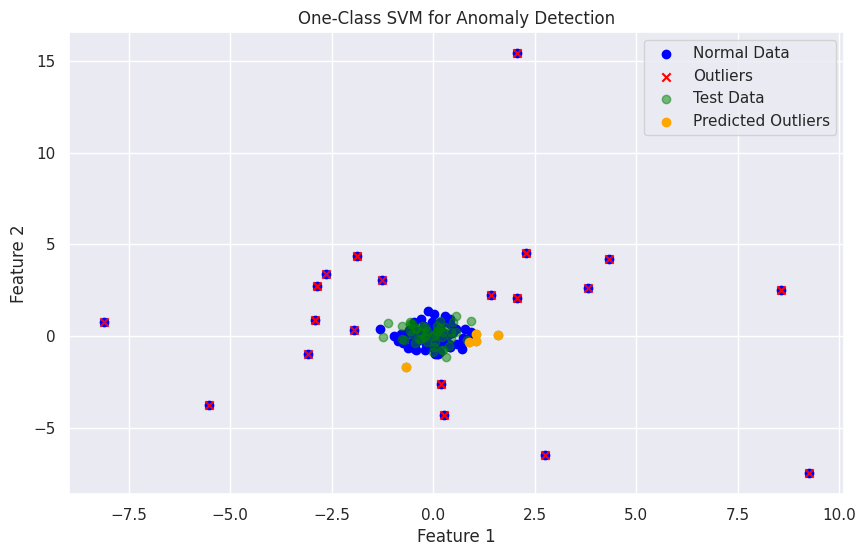

In [186]:
# Generate data
np.random.seed(42)
normal_data = 0.5 * np.random.randn(100, 2)
outliers = 4 * np.random.randn(20, 2)

# Combine normal data and outliers
X_train = np.vstack([normal_data, outliers])

# Fit the OneClassSVM model
model = OneClassSVM(kernel='rbf', nu=0.05)  # nu is an important parameter (0.05 is just an example)
model.fit(X_train)

# Generate data
X_test = 0.5 * np.random.randn(50, 2)

# Predict if each sample is an inlier (1) or outlier (-1)
predictions = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], label='Normal Data', color='blue')

# outliers in training data
plt.scatter(outliers[:, 0], outliers[:, 1], label='Outliers', color='red', marker='x')

# Plot test data and highlight predicted outliers
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test Data', color='green', alpha=0.5)
plt.scatter(X_test[predictions == -1, 0], X_test[predictions == -1, 1], label='Predicted Outliers', color='orange', marker='o')

plt.title('One-Class SVM for Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Important Question

**Should you use the primal or the dual form of the SVM problem to train a model
on a training set with millions of instances and hundreds of features?**
This question applies only to linear SVMs since kernelized SVMs can only use
the dual form. The computational complexity of the primal form of the SVM
problem is proportional to the number of training instances m, while the compu‐
tational complexity of the dual form is proportional to a number between m sqaure and
m cube.So if there are millions of instances, you should definitely use the primal
form, because the dual form will be much too slow.

**Can an SVM classifier output a confidence score when it classifies an instance?
What about a probability?**

An SVM classifier can output the distance between the test instance and the deci‐
sion boundary, and you can use this as a confidence score. However, this score
cannot be directly converted into an estimation of the class probability. If you set
probability=True when creating an SVM in Scikit-Learn, then after training it
will calibrate the probabilities using Logistic Regression on the SVM’s scores
(trained by an additional five-fold cross-validation on the training data). This
will add the predict_proba() and predict_log_proba() methods to the SVM.

**Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit
the training set. Should you increase or decrease γ (gamma)? What about C?**

If an SVM classifier trained with an RBF kernel underfits the training set, there
might be too much regularization. To decrease it, you need to increase gamma or C
(or both).

\- Above Questions Are From Hands On Machine Learning With Sklearn, Keras, Tensorflow, Book


**What is Platt Scaling In SVM?**

- In binary classification, a classifier often provides a decision function or decision score rather than a probability. This decision function outputs a score for each instance, and the sign of the score determines the predicted class (positive or negative).

- Platt scaling applies a logistic (sigmoid) transformation to the decision scores to obtain calibrated probabilities. 

- The logistic function is fitted to the decision scores, and the parameters are adjusted to maximize the likelihood of the true class labels.

- Once the parameters are estimated, the logistic function can be used to convert decision scores into calibrated probabilities. The calibrated probability represents the model's confidence or belief that an instance belongs to the positive class.

Sklearn Practical Tips: 

- When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected. Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use GridSearchCV with C and gamma spaced exponentially far apart to choose good values.

- You can define your own kernels by either giving the kernel as a python function or by precomputing the Gram matrix.

- In SVC, if the data is unbalanced (e.g. many positive and few negative), set class_weight='balanced' and/or try different penalty parameters C.

- Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

- Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results.